# Baics of Tensor Flow

In [3]:
import tensorflow as tf

print(tf.__version__)

1.10.0


In [4]:
  hello = tf.constant('Hello')

In [5]:
world = tf.constant('Workd!')

In [6]:
type(hello)

tensorflow.python.framework.ops.Tensor

In [7]:
print(hello)

Tensor("Const:0", shape=(), dtype=string)


In [10]:
with tf.Session() as sess:
    result = sess.run(hello+world)

In [11]:
result

b'HelloWorkd!'

In [12]:
a = tf.constant(10)

b = tf.constant(20)

In [13]:
a + b

<tf.Tensor 'add_2:0' shape=() dtype=int32>

In [14]:
a + b

<tf.Tensor 'add_3:0' shape=() dtype=int32>

In [15]:
with tf.Session() as sess:
    result = sess.run(a+b)

In [16]:
result

30

# TensorFlow graphs

In [1]:
# In tensorflow we will construct a graph and the execute it

In [2]:
import tensorflow as tf

In [3]:
n1 = tf.constant(1)

In [5]:
n2 = tf.constant(2)

In [6]:
n3 = n1 + n2

In [8]:
with tf.Session() as sess:
    result = sess.run(n3)

In [10]:
print(result)

3


# Variables and placeholders

In [44]:
import tensorflow as tf

In [45]:
sess = tf.InteractiveSession()

/Users/sajjadsalaria/anaconda/lib/python3.6/site-packages/tensorflow/python/client/session.py:1645: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [46]:
my_tensor = tf.random_uniform((4,4),0,1)

In [47]:
my_tensor

<tf.Tensor 'random_uniform_3:0' shape=(4, 4) dtype=float32>

In [48]:
my_variable = tf.Variable(initial_value=my_tensor)

In [49]:
print(my_variable)

<tf.Variable 'Variable_3:0' shape=(4, 4) dtype=float32_ref>


In [50]:
# sess.run(my_var) you need to inintizlize first

In [51]:
init = tf.global_variables_initializer()

In [53]:
sess.run(init)

In [54]:
sess.run(my_variable)

array([[0.58835065, 0.06384337, 0.66991603, 0.46359992],
       [0.25755715, 0.42090297, 0.75968325, 0.0959456 ],
       [0.01721811, 0.32184863, 0.7705592 , 0.07374549],
       [0.18829119, 0.67833996, 0.61350167, 0.76302564]], dtype=float32)

In [55]:
# placeholders

ph = tf.placeholder(tf.float32)

## ``` We have learned about sessions, Graphs, Variables and Placeholders.
with these building blocks we can create our first neuron
we'll create a neuron that perfoms a very simple linear fit to soe 2-D data ```

In [61]:
import numpy as np
import tensorflow as tf

In [62]:
np.random.seed(101)
tf.set_random_seed(101)

In [65]:
rand_a = np.random.uniform(0,100,(5,5))
rand_a

array([[51.63986277, 57.06675869,  2.84742265, 17.15216562, 68.52769817],
       [83.38968626, 30.69662197, 89.36130797, 72.15438618, 18.99389542],
       [55.42275911, 35.2131954 , 18.18924027, 78.56017619, 96.54832224],
       [23.23536618,  8.35614337, 60.35484223, 72.89927573, 27.62388285],
       [68.53063288, 51.78674742,  4.84845374, 13.78692376, 18.69674261]])

In [82]:
rand_b = np.random.uniform(0,100,(5,5))
rand_b

array([[34.36315779, 86.50998163, 83.02777122, 53.81614492, 92.24693726],
       [ 9.71464798, 10.28474932, 70.15072957, 89.04798691, 15.95603009],
       [27.55725449, 67.24915297, 16.4303124 , 70.13711366, 48.76352222],
       [68.06777682, 52.15481923,  4.33966944, 22.39366035, 57.52050869],
       [12.04336601, 50.01167138, 13.80095683,  5.28084011, 17.82769225]])

In [68]:
# creating the placeholders

In [69]:
a = tf.placeholder(tf.float32)

In [70]:
b = tf.placeholder(tf.float32)

In [71]:
add_op = a+b 

In [73]:
mul_op =  a*b

In [75]:
with tf.Session() as sess:
    
    add_result = sess.run(add_op,feed_dict={a:10,b:20})
    print(add_result)

30.0


In [83]:
with tf.Session() as sess:
    
    add_result = sess.run(add_op,feed_dict={a:rand_a,b:rand_b})
    print(add_result)
    print('\n')
    mul_result = sess.run(mul_op,feed_dict={a:rand_a,b:rand_b})
    print(mul_result)

[[133.79495  185.94177  182.45956  153.24794  191.67874 ]
 [ 61.78119   62.351288 122.21727  141.11453   68.02257 ]
 [ 85.4362   125.128105  74.309265 128.01607  106.64247 ]
 [141.54968  125.63672   77.82157   95.875565 131.00241 ]
 [ 66.23955  104.207855  67.99713   59.47702   72.02387 ]]


[[3416.7905  8601.843   8255.601   5351.0356  9172.278  ]
 [ 505.8081   535.4913  3652.5056  4636.421    830.77527]
 [1594.985   3892.3105   950.9693  4059.4626  2822.3816 ]
 [5001.75    3832.4353   318.88715 1645.5287  4226.7163 ]
 [ 652.7044  2710.4417   747.9591   286.20135  966.19275]]


# Example Neural Network

In [86]:
n_features = 10
n_dense_neurons = 3

In [87]:
x = tf.placeholder(tf.float32,(None,n_features))

In [88]:
W = tf.Variable(tf.random_normal([n_features,n_dense_neurons]))

b = tf.Variable(tf.ones([n_dense_neurons]))

In [89]:
xW = tf.matmul(x,W) 

In [90]:
z = tf.add(xW,b)

In [91]:
a = tf.sigmoid(z)

In [92]:
init = tf.global_variables_initializer()

In [96]:
with tf.Session() as sess:
    
    sess.run(init)
    
    layer_out = sess.run(a,feed_dict={x:np.random.random([1,n_features])})

In [97]:
print(layer_out)

[[0.5575842  0.94935143 0.94441   ]]


# Simple Linear Regression

In [99]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [100]:
x_data

array([0.93679768, 1.62189237, 2.67752533, 3.10704016, 4.91423045,
       4.68304005, 7.14644022, 7.86664797, 9.63445   , 8.78127057])

In [101]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [102]:
y_label

array([ 0.85356555,  1.67283722,  2.80745771,  3.32393289,  5.87052783,
        4.66613842,  6.0637279 ,  6.96074546,  7.53339555, 11.21191407])

In [104]:
import matplotlib.pyplot as plt

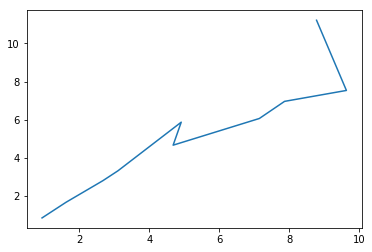

In [105]:
plt.plot(x_data,y_label)

## y = mx + b

In [106]:
np.random.rand(2)

array([0.08010354, 0.60721627])

In [108]:
m = tf.Variable(0.44)
b = tf.Variable(0.87)

In [109]:
error = 0

for x,y in zip(x_data,y_label):
    y_hat = m*x + b
    
    error += (y-y_hat)**2

In [110]:
# optimizer

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [111]:
init = tf.global_variables_initializer()

In [116]:
with tf.Session() as sess:
    
    sess.run(init)
    
    training_steps = 1000
    
    for i in range(training_steps):
        
        sess.run(train)
        
    final_slope, final_intercept = sess.run([m,b])

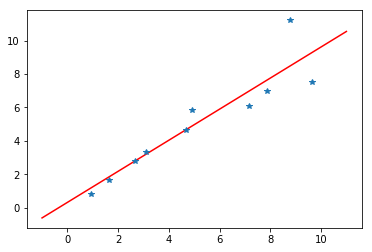

In [117]:
x_test = np.linspace(-1,11,10)

# y = mx + b

y_pred_plot = final_slope*x_test + final_intercept

plt.plot(x_test,y_pred_plot, 'r')
plt.plot(x_data,y_label, '*')